In [26]:
import pandas as pd

In [27]:
data=pd.read_csv('Mall_Customers.csv')

In [28]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
70,71,Male,70,49,55
18,19,Male,52,23,29
121,122,Female,38,67,40
101,102,Female,49,62,48
16,17,Female,35,21,35


In [29]:
data.drop(columns=['CustomerID'],inplace=True)

In [30]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [31]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb=LabelEncoder()

In [34]:
data['Gender']=lb.fit_transform(data['Gender'])

In [35]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [36]:
data.rename(columns={'Annual Income (k$)':'Annual income','Spending Score (1-100)':'spending score'},inplace=True)

In [37]:
data.sample()

,Gender,Age,Annual income,spending score
152,0,44,78,20


In [38]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss=StandardScaler()

In [39]:
data.head()

,Gender,Age,Annual income,spending score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [42]:
from sklearn.cluster import KMeans

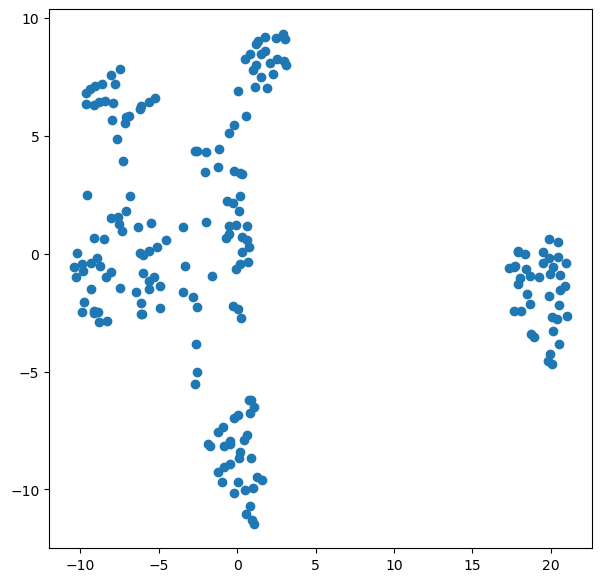

In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [45]:
data.head()

,Gender,Age,Annual income,spending score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int32
 1   Age             200 non-null    int64
 2   Annual income   200 non-null    int64
 3   spending score  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [47]:
len(data)

200

In [48]:
data=ss.fit_transform(data)

In [49]:
data[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

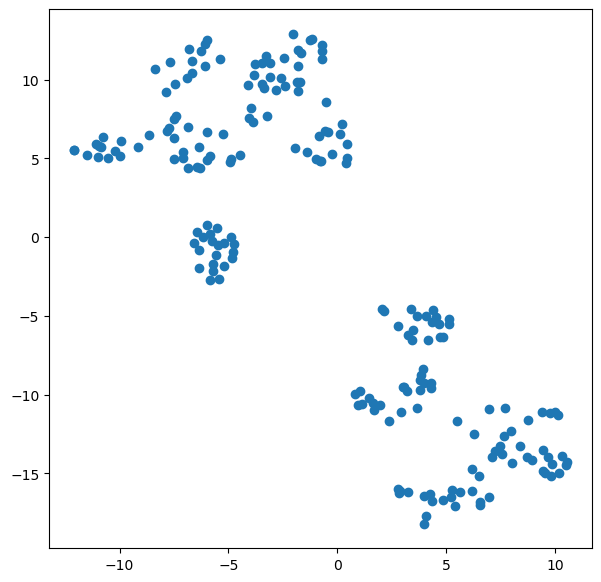

In [50]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [56]:
sse=[]
for i in range(1,10):
    cluster=KMeans(n_clusters=i)
    cluster.fit(data)
    sse.append(cluster.inertia_)

C:\Users\sunil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sunil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sunil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sunil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

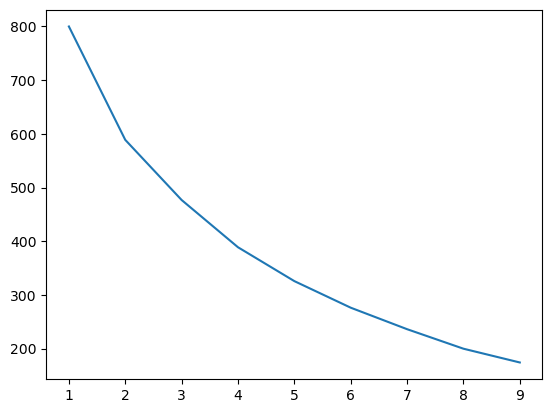

In [57]:
plt.plot(range(1,10),sse)

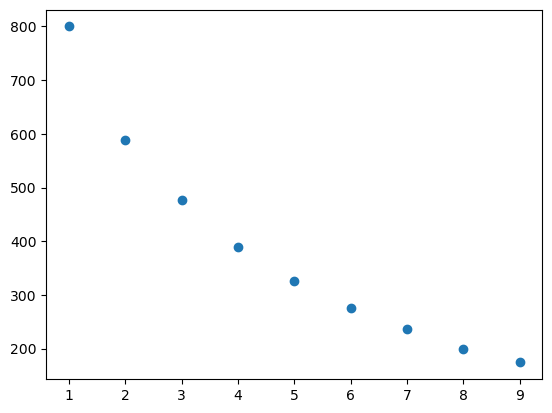

In [58]:
plt.scatter(range(1,10),sse)

In [60]:
model=KMeans(n_clusters=5)
a=model.fit_predict(data)

C:\Users\sunil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sunil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\sunil\AppData\Local\Temp\ipykernel_5788\2980612952.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_data[:, 0], tsne_data[:, 1],cmap='viridis')


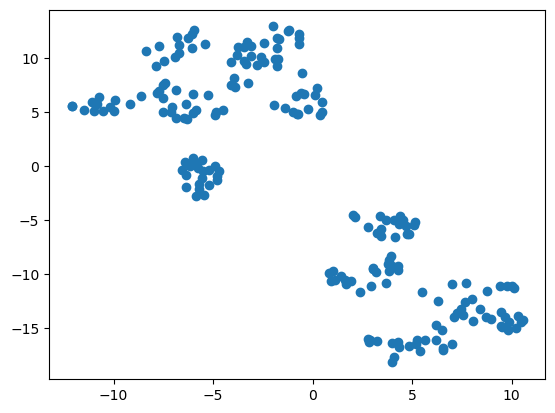

In [65]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1],cmap='viridis')

In [67]:
import pickle
pickle.dump(cluster,open('customerseg.pkl','wb'))